In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Создадим случайную последовательность

In [ ]:
np.random.seed(1)

In [ ]:
number_of_elements = 300
alpha = 0.05

In [ ]:
stochastic_data = np.random.randn(int(number_of_elements))

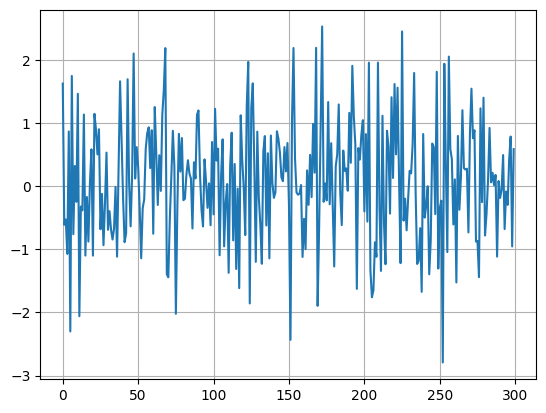

In [ ]:
plt.plot(stochastic_data)
plt.grid(True)

# Проведем расчет выборочного среднего и среднеквадратического отклонения

In [ ]:
mean = np.mean(stochastic_data)
std = np.std(stochastic_data)

# Проведем расчет оценки плотности распределения

In [ ]:
min_element = np.min(stochastic_data)
max_element = np.max(stochastic_data)

number_of_intervals = np.round(1 + np.log2(number_of_elements))

In [ ]:
step = (np.round(max_element) - (np.round(min_element))) / (np.round(number_of_intervals) + 1)

In [ ]:
number_of_intervals

9.0

In [ ]:
step

0.6

In [ ]:
step_list = np.arange(-3, 3.6, step)

In [ ]:
step_list

array([-3.0000000e+00, -2.4000000e+00, -1.8000000e+00, -1.2000000e+00,
       -6.0000000e-01,  4.4408921e-16,  6.0000000e-01,  1.2000000e+00,
        1.8000000e+00,  2.4000000e+00,  3.0000000e+00])

In [ ]:
mean_in_intervals = np.zeros(int(number_of_intervals+1))

In [ ]:
for i in range(0, int(number_of_intervals+1)):
  mean_in_intervals[i] = (step_list[i+1] + step_list[i]) / 2

In [ ]:
mean_in_intervals

array([-2.7, -2.1, -1.5, -0.9, -0.3,  0.3,  0.9,  1.5,  2.1,  2.7])

In [ ]:
def count_elements_in_range(arr, min_val, max_val):
    filtered_arr = filter(lambda x: min_val <= x <= max_val, arr)
    count = len(list(filtered_arr))
    return count

In [ ]:
partition_check_data = np.zeros(int(number_of_intervals+1))

for i in range(int(number_of_intervals+1)):

  partition_check_data[i] = count_elements_in_range(stochastic_data, step_list[i], step_list[i+1])


In [ ]:
partition_check = np.cumsum(partition_check_data)

partition_check

array([  2.,   7.,  27.,  75., 138., 215., 266., 287., 298., 300.])

In [ ]:
frequencies = partition_check_data

In [ ]:
frequencies

array([ 2.,  5., 20., 48., 63., 77., 51., 21., 11.,  2.])

In [ ]:
omega = frequencies / number_of_elements

In [ ]:
omega

array([0.00666667, 0.01666667, 0.06666667, 0.16      , 0.21      ,
       0.25666667, 0.17      , 0.07      , 0.03666667, 0.00666667])

In [ ]:
ro = np.zeros(int(number_of_intervals+1))

for i in range(int(number_of_intervals+1)):
  ro[i] = omega[i] / (step_list[i+1] - step_list[i])

In [ ]:
ro

array([0.01111111, 0.02777778, 0.11111111, 0.26666667, 0.35      ,
       0.42777778, 0.28333333, 0.11666667, 0.06111111, 0.01111111])

In [ ]:
statistic_df = pd.DataFrame({
    'mean_in_interval': mean_in_intervals,
    'frequencies': frequencies,
    'omega': omega,
    'ro': ro
})

In [ ]:
statistic_df

,mean_in_interval,frequencies,omega,ro
0,-2.7,2.0,0.006667,0.011111
1,-2.1,5.0,0.016667,0.027778
2,-1.5,20.0,0.066667,0.111111
3,-0.9,48.0,0.160000,0.266667
4,-0.3,63.0,0.210000,0.350000
5,0.3,77.0,0.256667,0.427778
6,0.9,51.0,0.170000,0.283333
7,1.5,21.0,0.070000,0.116667
8,2.1,11.0,0.036667,0.061111
9,2.7,2.0,0.006667,0.011111


In [ ]:
statistic_df['frequencies'].sum()

300.0

# Построим гистограмы вычесленных частот

<BarContainer object of 10 artists>

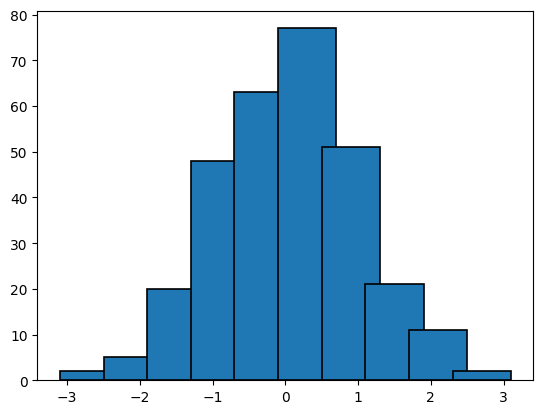

In [ ]:
plt.bar(statistic_df['mean_in_interval'], statistic_df['frequencies'], edgecolor='black', linewidth=1.2)

<BarContainer object of 10 artists>

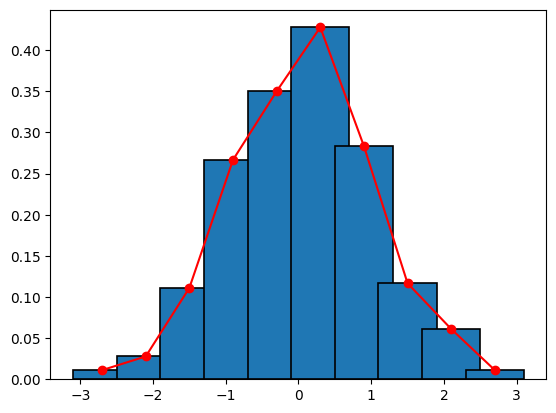

In [ ]:
plt.plot(statistic_df['mean_in_interval'], statistic_df['ro'], marker='o', color='red', linestyle='-')
plt.bar(statistic_df['mean_in_interval'], statistic_df['ro'], edgecolor='black', linewidth=1.2)

In [ ]:
x_values = np.linspace(-3, 3, 100)  # значения для оси x
y_values = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(x_values - mean)**2 / (2 * std**2))  # значения для оси y

<BarContainer object of 10 artists>

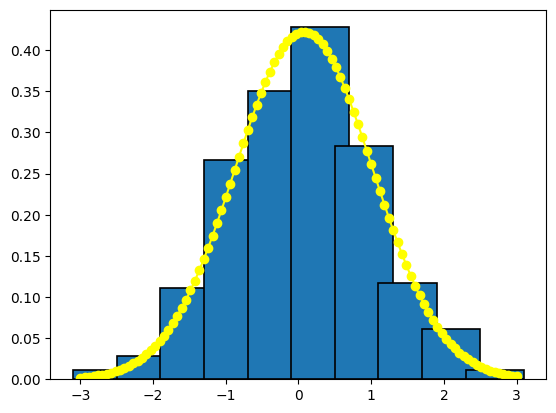

In [ ]:
plt.plot(x_values, y_values, marker='o', color='yellow', linestyle='-')
plt.bar(statistic_df['mean_in_interval'], statistic_df['ro'], edgecolor='black', linewidth=1.2)

# Осуществеим проверку критерия Хи2

In [ ]:
norm_step_list = (step_list - mean) / std

In [ ]:
cdf_norm_step_list = stats.norm.cdf(norm_step_list) - 0.5

In [ ]:
mean_cdf_norm_step_list = np.zeros(int(number_of_intervals+1))

In [ ]:
for i in range(0, int(number_of_intervals+1)):
  mean_cdf_norm_step_list[i] = (cdf_norm_step_list[i+1] + cdf_norm_step_list[i]) / 2

In [ ]:
theoretical_ro = np.zeros(int(number_of_intervals+1))

In [ ]:
for i in range(0, int(number_of_intervals+1)):
  theoretical_ro[i]  = np.round((cdf_norm_step_list[i+1] - cdf_norm_step_list[i]) * number_of_elements)

In [ ]:
theoretical_ro

array([ 1.,  6., 19., 45., 69., 73., 52., 25.,  8.,  2.])

<BarContainer object of 10 artists>

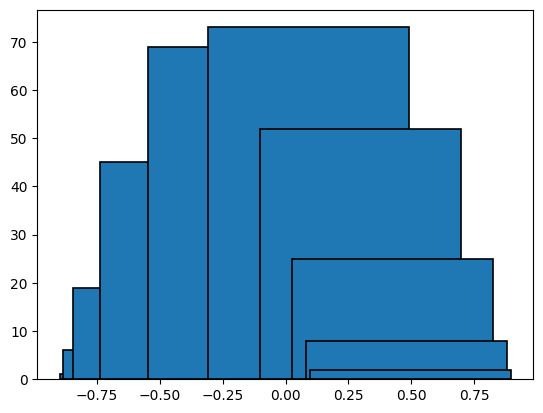

In [ ]:
plt.bar(mean_cdf_norm_step_list, theoretical_ro, edgecolor='black', linewidth=1.2)

In [ ]:
theoretical_ro.sum()

300.0

In [ ]:
statistic_df['frequencies'].sum()

300.0

In [ ]:
chi, p_value = stats.chisquare(f_obs=statistic_df['frequencies'].to_numpy(), f_exp=theoretical_ro)

In [ ]:
alpha = 0.05
print("p value is " + str(p_value))
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9150307093999503
Independent (H0 holds true)
